In [1]:
# pandas,numpy
import numpy as np
import pandas as pd

# matplotlib, seaborn,counter
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# machine learning
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# model selection
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc

# Preprocessing
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Get our data
data=pd.read_csv("E:/kaggle_data/Churn/train.csv")
data.columns=['State','Account_Length','Area_Code','Phone','Intl_Plan','VMail_Plan','VMail_Message','Day_Mins','Day_Calls','Day_Charge','Eve_Mins','Eve_Calls','Eve_Charge','Night_Mins','Night_Calls','Night_Charge','Intl_Mins','Intl_Calls','Intl_Charge','CustServ_Calls','Churn']                         

In [3]:
# Create new variable "Churn2"
data.loc[:,'Churn2']=0
data.loc[data.Churn=='True.','Churn2']=1

In [4]:
# Extract target variables
ydf=data[['Churn2']]
data=data.drop(['Churn','Churn2'],axis=1)

In [5]:
#preview the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State             3333 non-null object
Account_Length    3333 non-null int64
Area_Code         3333 non-null int64
Phone             3333 non-null object
Intl_Plan         3333 non-null object
VMail_Plan        3333 non-null object
VMail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Mins          3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Mins        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Mins         3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
CustServ_Calls    3333 non-null int64
dtypes: float64(8), int64(8), object(4)
memory usage: 520.9+ KB


No null values in data

In [6]:
data.head()

,State,Account_Length,Area_Code,Phone,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [7]:
data.describe()

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Need to check Outlier in Account_Length,VMail_Message,Night_Mins,Intl_Calls,CustServ_Calls

In [8]:
##OUTLIER DETECTION
 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   


# detect outliers for Account_Length,VMail_Message,Night_Mins,Intl_Calls,CustServ_Calls
Outliers_to_drop = detect_outliers(data,2,["Account_Length","VMail_Message","Night_Mins","Intl_Calls","CustServ_Calls"])
Outliers_to_drop

[]

No Such Outlier found..Great 

# First Model

In [9]:
Phone_ID=data['Phone']
del data['Phone']

In [10]:
Y=np.ravel(ydf)

In [11]:
train_x,test_x,train_y,test_y=train_test_split(data,Y,test_size=0.2,random_state=2)

In [12]:
train_x=pd.get_dummies(train_x)
test_x=pd.get_dummies(test_x)

In [13]:
GBM=GradientBoostingClassifier(random_state=42)
GBM.fit(train_x,train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [14]:
GBM.estimators_[0][0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x000000000C3BF240>,
           splitter='best')

In [15]:
GBM.score(train_x,train_y)

0.97261815453863465

In [16]:
GBM.score(test_x,test_y)

0.94752623688155924

Feature ranking:
1. feature 5 (0.116220)
2. feature 3 (0.103519)
3. feature 13 (0.083852)
4. feature 15 (0.077824)
5. feature 8 (0.077748)
6. feature 6 (0.065407)
7. feature 12 (0.062777)
8. feature 14 (0.055769)
9. feature 11 (0.052499)
10. feature 9 (0.036283)
11. feature 67 (0.035924)
12. feature 2 (0.032515)
13. feature 59 (0.025004)
14. feature 68 (0.023429)
15. feature 4 (0.022948)
16. feature 0 (0.021016)
17. feature 35 (0.014457)
18. feature 7 (0.011960)
19. feature 57 (0.011625)
20. feature 47 (0.009814)
21. feature 69 (0.008515)
22. feature 10 (0.006492)
23. feature 70 (0.006036)
24. feature 27 (0.005733)
25. feature 51 (0.005098)
26. feature 1 (0.004973)
27. feature 38 (0.004543)
28. feature 30 (0.004315)
29. feature 56 (0.002475)
30. feature 18 (0.002328)
31. feature 42 (0.002278)
32. feature 20 (0.002158)
33. feature 32 (0.001906)
34. feature 37 (0.001595)
35. feature 29 (0.000688)
36. feature 46 (0.000239)
37. feature 64 (0.000038)
38. feature 60 (0.000000)
39. feature 61

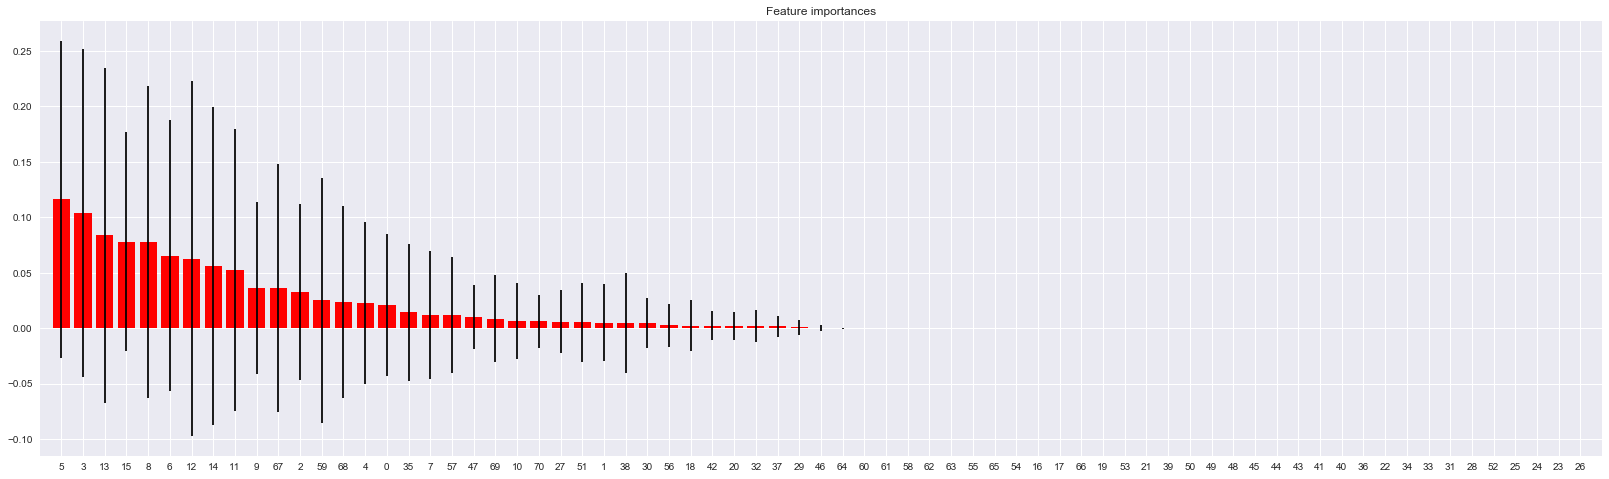

In [17]:
importances = GBM.feature_importances_
std = np.std([tree[0].feature_importances_ for tree in GBM.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of GBM
plt.figure(figsize=(28,8))
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_x.shape[1]), indices)
plt.xlim([-1, train_x.shape[1]])
plt.show()

So Important feature are

Day_Calls
, VMail_Message
, Intl_Mins
, Intl_Charge
, Eve_Calls
, Day_Charge
, Night_Charge
, Intl_Calls
, Night_Calls
, Eve_Charge

# Exploratory Data Analysis

We should start with categorical features

In [18]:
# Create new dataframe 'temp'
temp=pd.concat([data,ydf],axis=1)

In [19]:
# Create new feature 'Region'

temp.loc[:,'Region']=np.nan
temp.loc[temp.State.isin(['AZ','NM','OK','TX']),'Region']='SW'
temp.loc[temp.State.isin(['AR','LA','MS','AL','TN','KY','GA','FL','WV','DE','VA','NC','SC','MD']),'Region']='SE'
temp.loc[temp.State.isin(['PA','NJ','CT','RI','MA','NH','ME','VT','NY']),'Region']='NE'
temp.loc[temp.State.isin(['ND','SD','NE','KS','MN','IA','MO','WI','IL','MI','IN','OH']),'Region']='MW'
temp.loc[temp.State.isin(['AK','HI','WA','OR','ID','MT','WY','UT','CO','NV','CA']),'Region']='West'

In [20]:
temp.Region.value_counts()

SE      922
MW      802
West    705
NE      591
SW      259
Name: Region, dtype: int64

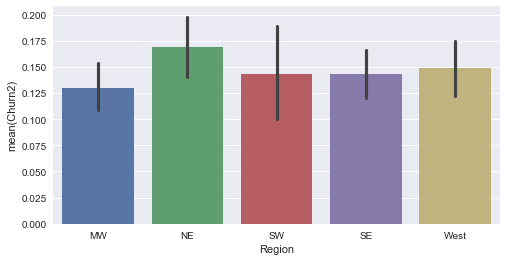

In [21]:
fig=plt.subplots(figsize=(8,4))
sns.barplot(x='Region',y='Churn2',data=temp)
plt.show()

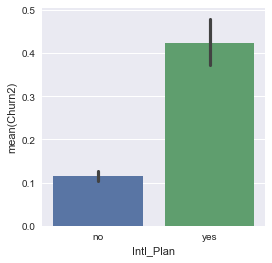

In [22]:
fig=plt.subplots(figsize=(4,4))
sns.barplot(x='Intl_Plan',y='Churn2',data=temp)
plt.show()

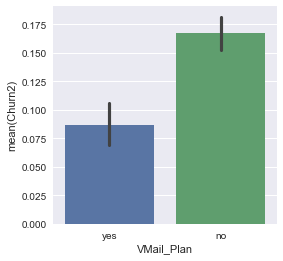

In [23]:
fig=plt.subplots(figsize=(4,4))
sns.barplot(x='VMail_Plan',y='Churn2',data=temp)
plt.show()

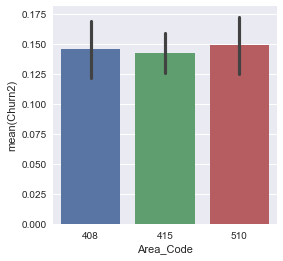

In [24]:
fig=plt.subplots(figsize=(4,4))
sns.barplot(x='Area_Code',y='Churn2',data=temp)
plt.show()

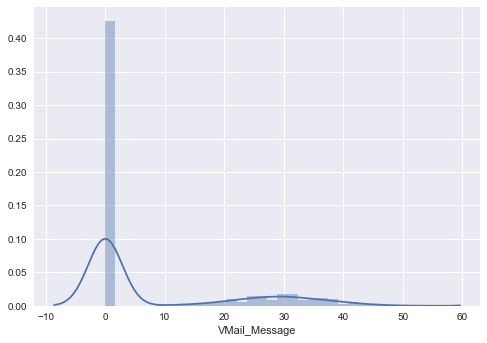

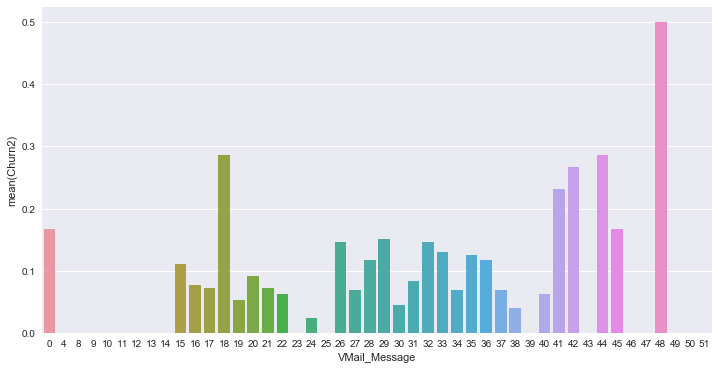

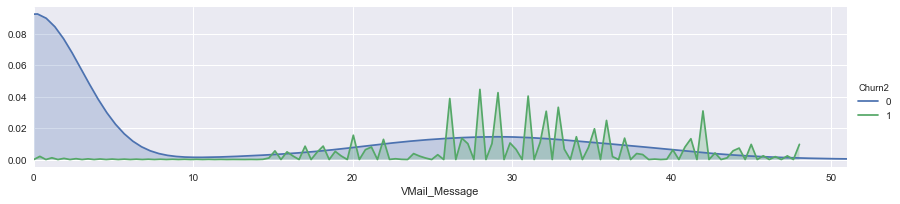

In [25]:
# Distribution plot
sns.distplot(data['VMail_Message'],bins=30)
plt.show()

# Mean churn over VMail_Message 
plt.figure(figsize=(12,6))
average= temp[["VMail_Message", "Churn2"]].groupby(['VMail_Message'],as_index=False).mean()
sns.barplot(x='VMail_Message', y='Churn2', data=average)
plt.show()

# KDE distribution over VMail_Message with Churn 0&1
facet = sns.FacetGrid(data=temp, hue="Churn2",aspect=4)
facet.map(sns.kdeplot,'VMail_Message',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['VMail_Message'].max()))
plt.show()

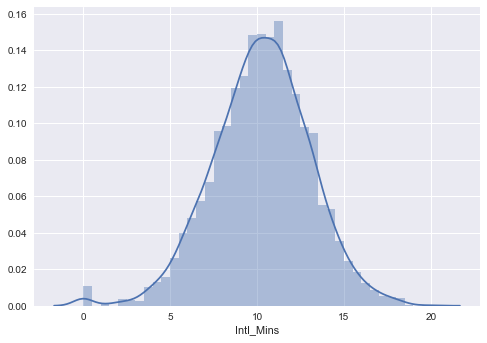

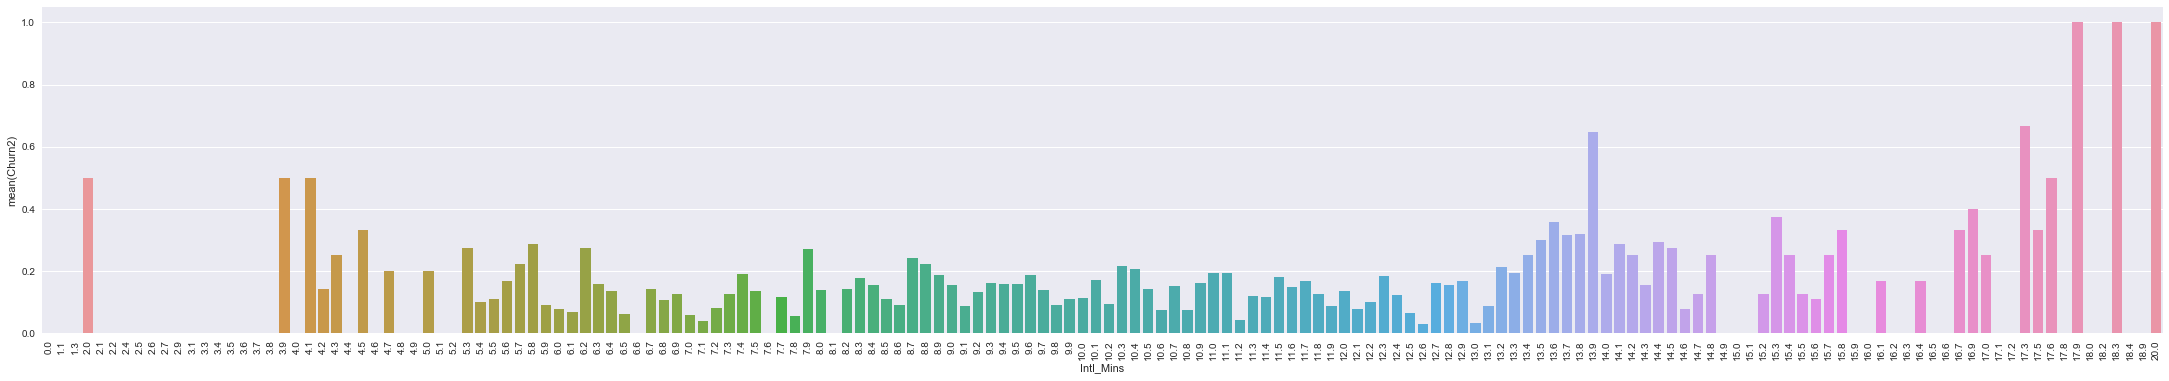

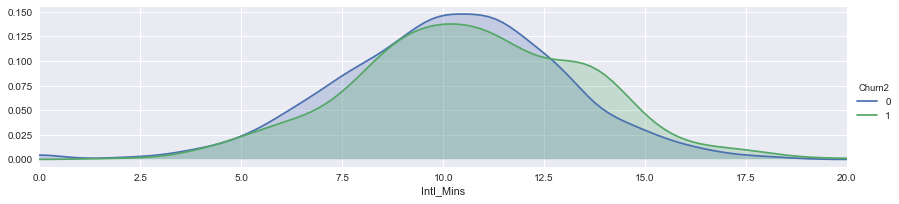

In [26]:
# Distribution plot
sns.distplot(data['Intl_Mins'],bins=40)
plt.show()

# Mean churn over International Mins 
plt.figure(figsize=(38,6))
average= temp[["Intl_Mins", "Churn2"]].groupby(['Intl_Mins'],as_index=False).mean()
sns.barplot(x='Intl_Mins', y='Churn2', data=average)
plt.xticks(rotation='vertical')
plt.show()

# KDE distribution over International Mins with Churn 0&1
facet = sns.FacetGrid(data=temp, hue="Churn2",aspect=4)
facet.map(sns.kdeplot,'Intl_Mins',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['Intl_Mins'].max()))
plt.show()

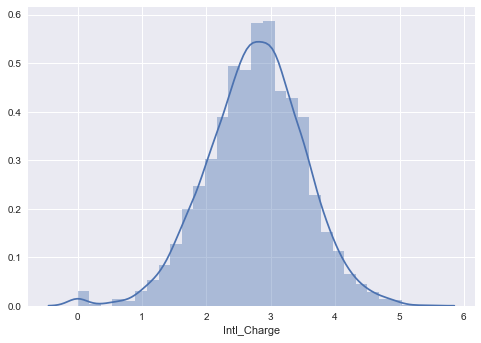

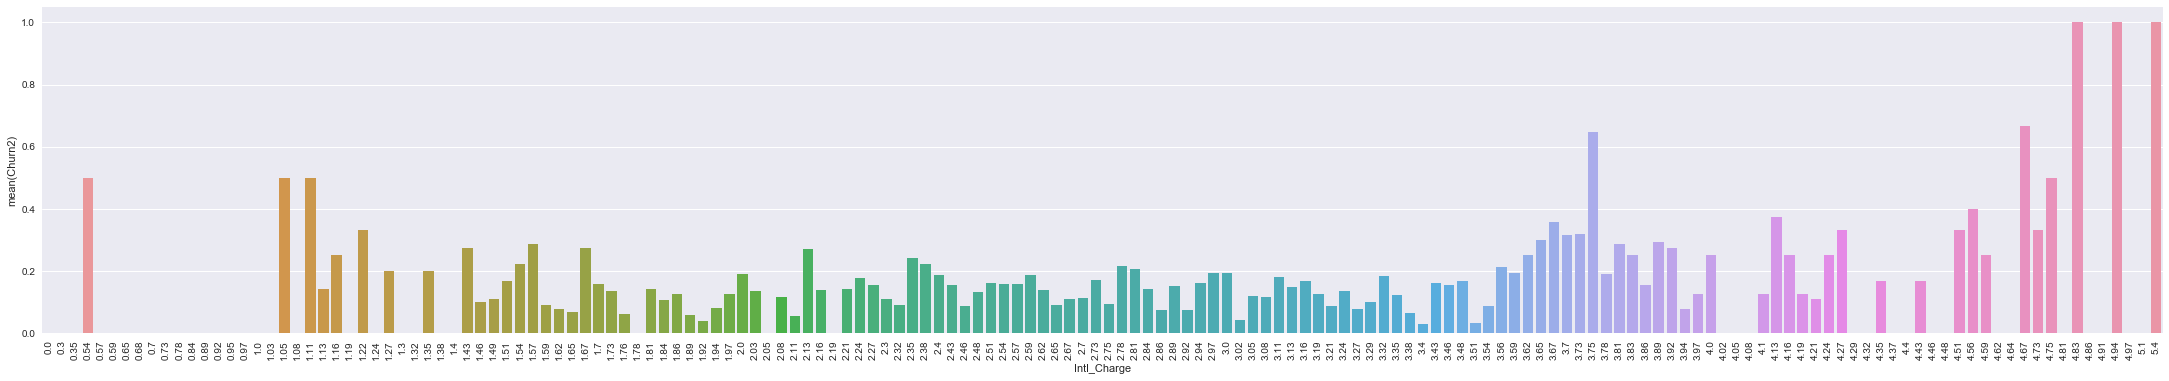

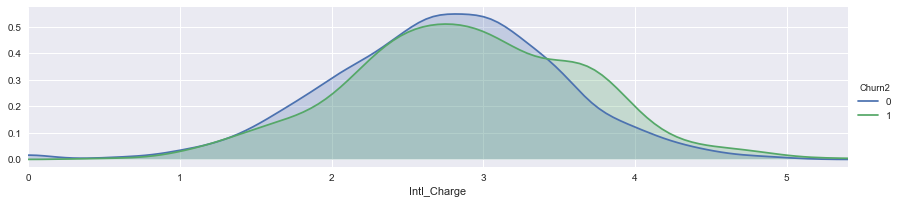

In [27]:
# Distribution plot
sns.distplot(data['Intl_Charge'],bins=30)
plt.show()

# Mean churn over International Charge 
plt.figure(figsize=(38,6))
average= temp[["Intl_Charge", "Churn2"]].groupby(['Intl_Charge'],as_index=False).mean()
sns.barplot(x='Intl_Charge', y='Churn2', data=average)
plt.xticks(rotation='vertical')
plt.show()

# KDE distribution over International Charge Churn 0&1
facet = sns.FacetGrid(data=temp, hue="Churn2",aspect=4)
facet.map(sns.kdeplot,'Intl_Charge',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['Intl_Charge'].max()))
plt.show()

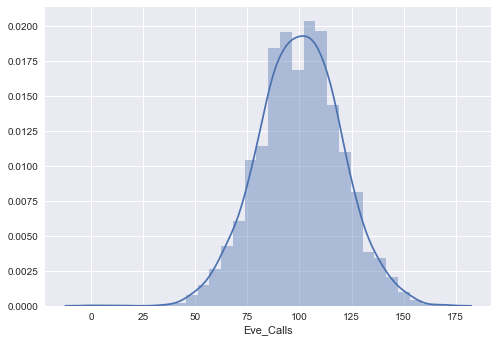

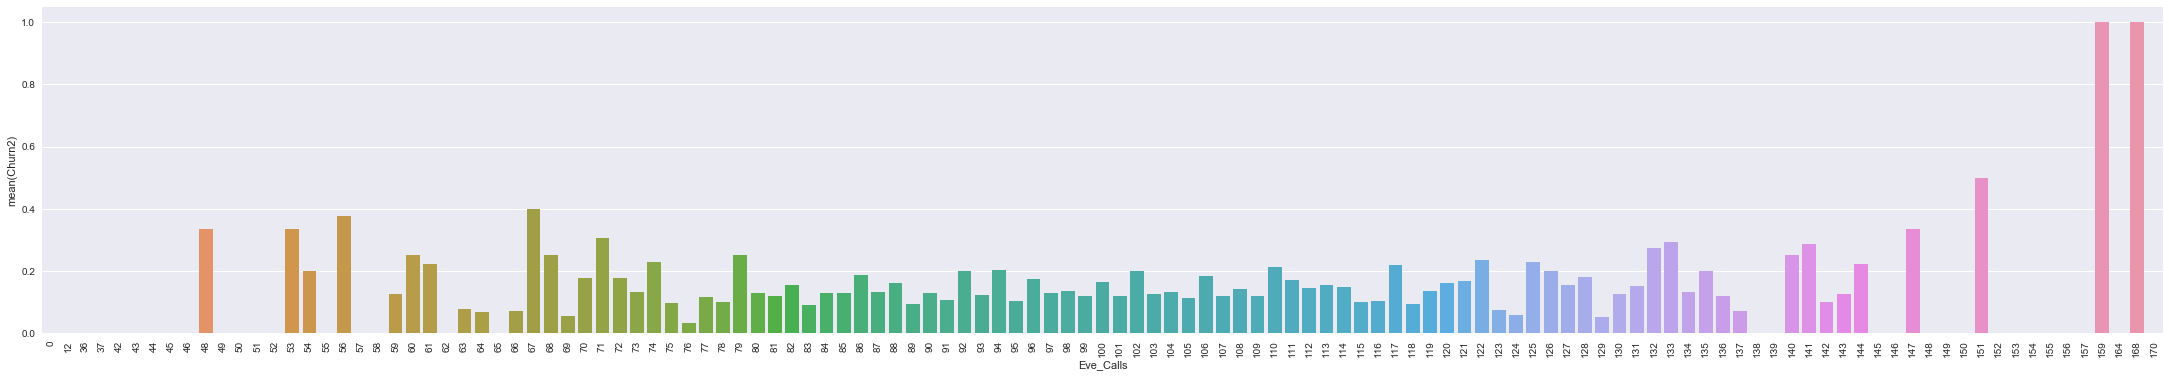

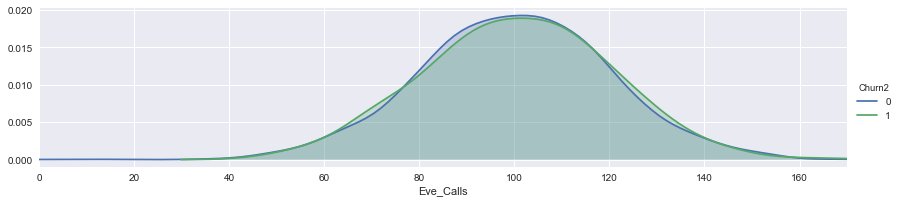

In [28]:
# Distribution plot
sns.distplot(data['Eve_Calls'],bins=30)
plt.show()

# Mean churn over Evening Calls 
plt.figure(figsize=(38,6))
average= temp[["Eve_Calls", "Churn2"]].groupby(['Eve_Calls'],as_index=False).mean()
sns.barplot(x='Eve_Calls', y='Churn2', data=average)
plt.xticks(rotation='vertical')
plt.show()

# KDE distribution over Evening Calls Churn 0&1
facet = sns.FacetGrid(data=temp, hue="Churn2",aspect=4)
facet.map(sns.kdeplot,'Eve_Calls',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['Eve_Calls'].max()))
plt.show()

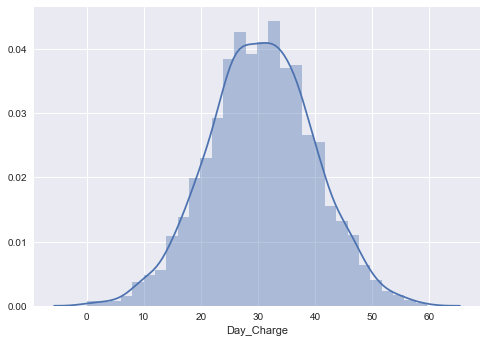

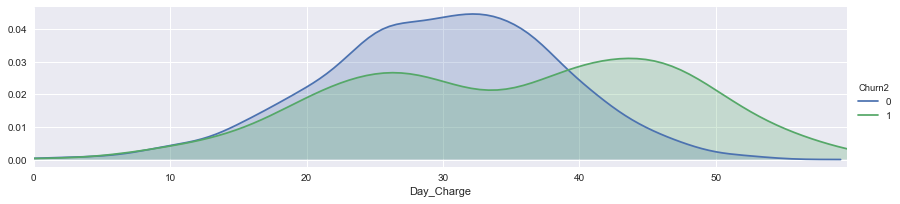

In [29]:
# Distribution plot
sns.distplot(data['Day_Charge'],bins=30)
plt.show()

# KDE distribution over Day Charge Churn 0&1
facet = sns.FacetGrid(data=temp, hue="Churn2",aspect=4)
facet.map(sns.kdeplot,'Day_Charge',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['Day_Charge'].max()))
plt.show()

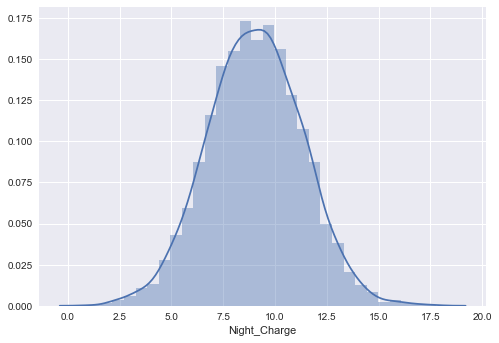

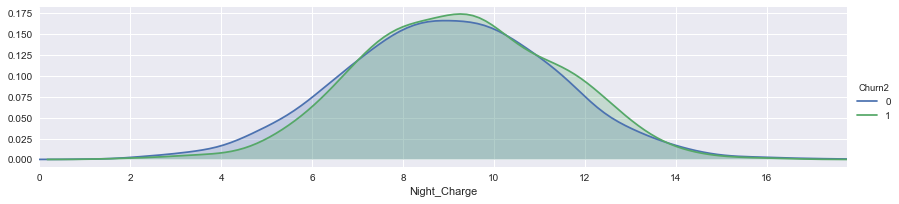

In [30]:
# Distribution plot
sns.distplot(data['Night_Charge'],bins=30)
plt.show()

# KDE distribution over Night Charge Churn 0&1
facet = sns.FacetGrid(data=temp, hue="Churn2",aspect=4)
facet.map(sns.kdeplot,'Night_Charge',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['Night_Charge'].max()))
plt.show()

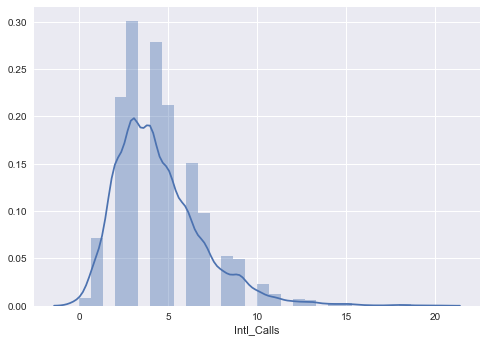

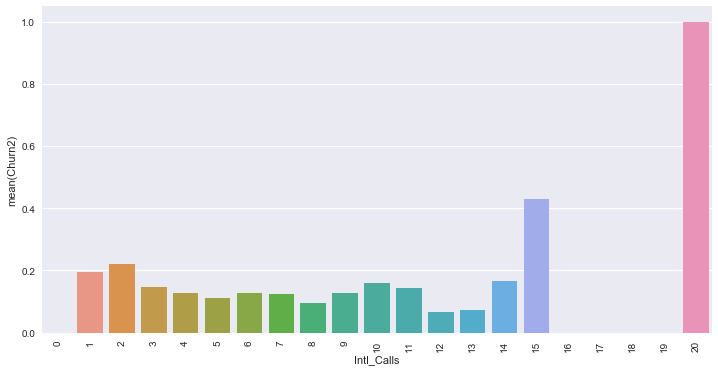

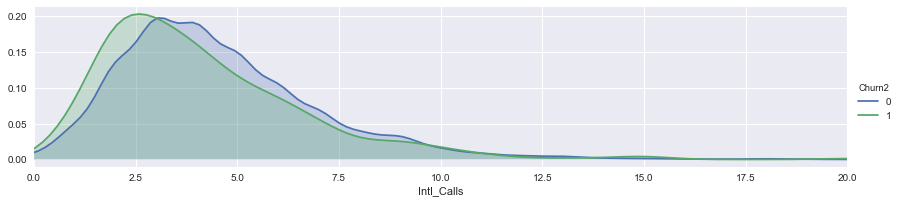

In [31]:
# Distribution plot
sns.distplot(data['Intl_Calls'],bins=30)
plt.show()

# Mean churn over International Calls 
plt.figure(figsize=(12,6))
average= temp[["Intl_Calls", "Churn2"]].groupby(['Intl_Calls'],as_index=False).mean()
sns.barplot(x='Intl_Calls', y='Churn2', data=average)
plt.xticks(rotation='vertical')
plt.show()

# KDE distribution over International Calls Churn 0&1
facet = sns.FacetGrid(data=temp, hue="Churn2",aspect=4)
facet.map(sns.kdeplot,'Intl_Calls',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['Intl_Calls'].max()))
plt.show()

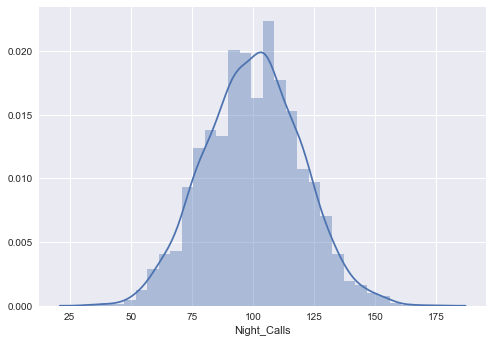

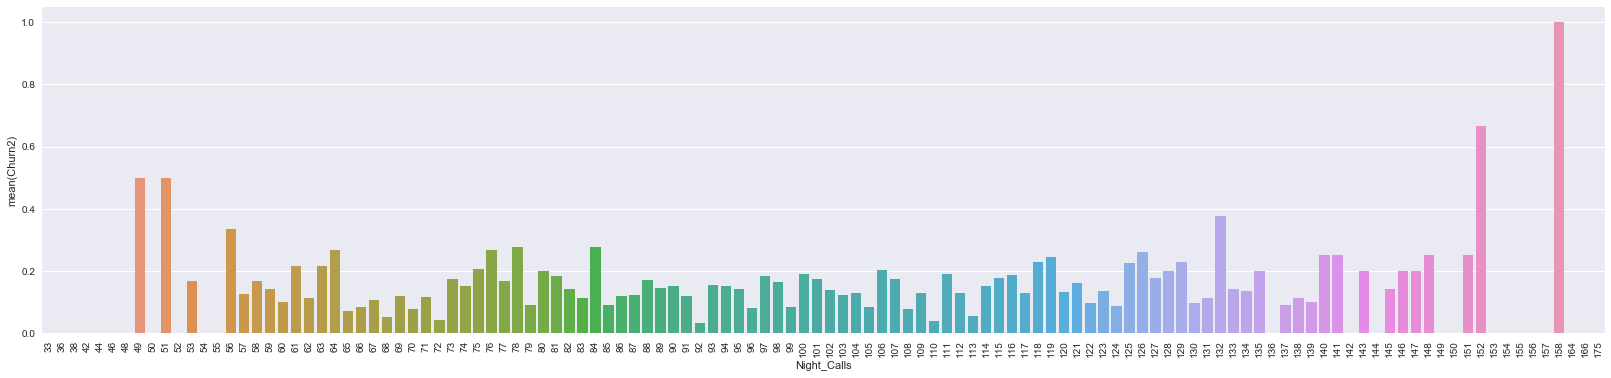

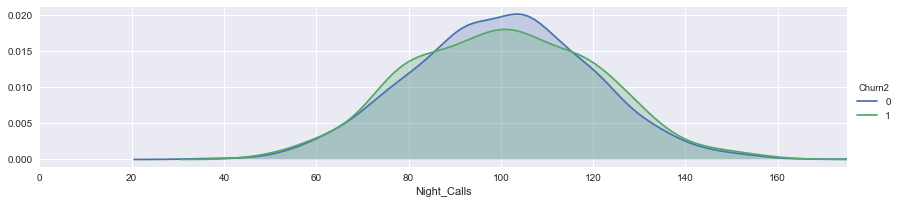

In [32]:
# Distribution plot
sns.distplot(data['Night_Calls'],bins=30)
plt.show()

# Mean churn over Night Calls 
plt.figure(figsize=(28,6))
average= temp[["Night_Calls", "Churn2"]].groupby(['Night_Calls'],as_index=False).mean()
sns.barplot(x='Night_Calls', y='Churn2', data=average)
plt.xticks(rotation='vertical')
plt.show()

# KDE distribution over Night Calls Churn 0&1
facet = sns.FacetGrid(data=temp, hue="Churn2",aspect=4)
facet.map(sns.kdeplot,'Night_Calls',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['Night_Calls'].max()))
plt.show()

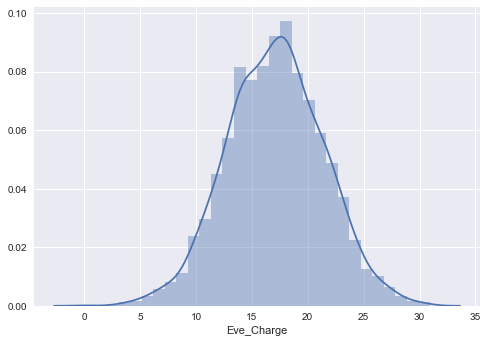

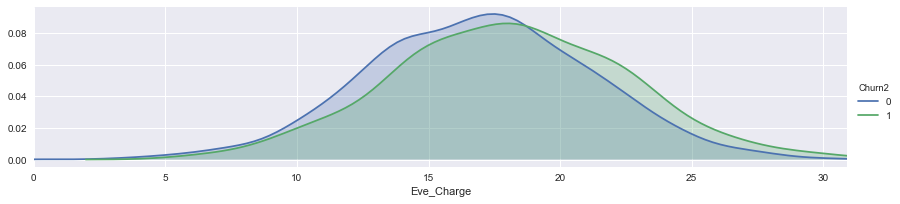

In [33]:
# Distribution plot
sns.distplot(data['Eve_Charge'],bins=30)
plt.show()

# KDE distribution over Evening Charge Churn 0&1
facet = sns.FacetGrid(data=temp, hue="Churn2",aspect=4)
facet.map(sns.kdeplot,'Eve_Charge',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['Eve_Charge'].max()))
plt.show()

# Pearson Correlation

In [34]:
del temp['State']

In [35]:
temp.loc[:,'intl_plan']=0
temp.loc[temp.Intl_Plan=='yes','intl_plan']=1

In [36]:
temp.loc[:,'vmail_plan']=0
temp.loc[temp.VMail_Plan=='yes','vmail_plan']=1

In [37]:
temp.loc[:,'region']=0
temp.loc[temp.Region=='SE','region']=1
temp.loc[temp.Region=='NE','region']=2
temp.loc[temp.Region=='MW','region']=3
temp.loc[temp.Region=='West','region']=4

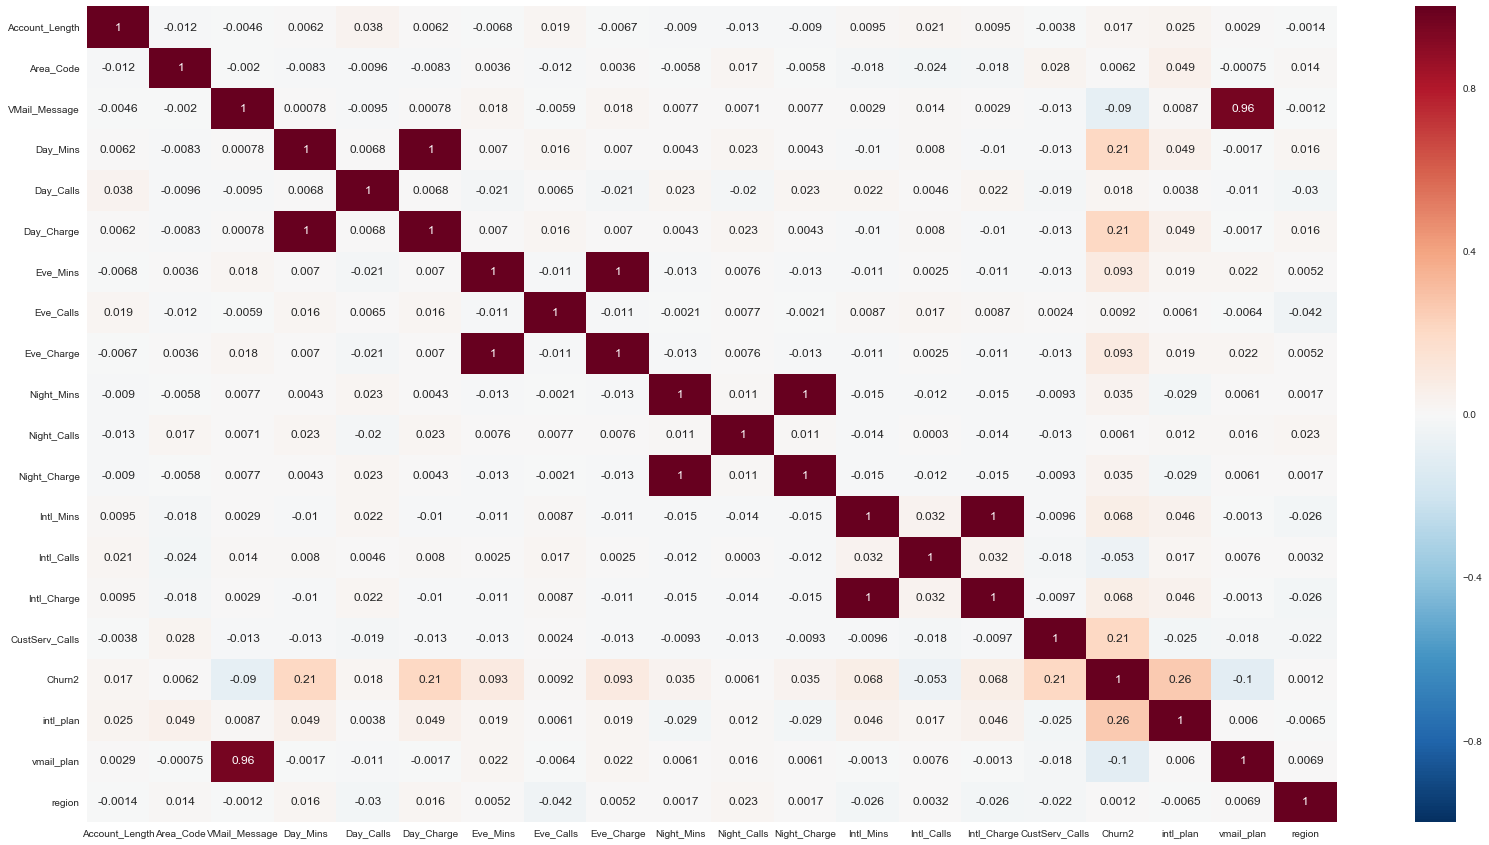

In [38]:
# Pearson Correlation
corra=temp.corr()
fig, ax = plt.subplots(figsize=(28,15))
sns.heatmap(corra,annot=True)
plt.show()

# Colinear Variables
(Day_Mins,Day_Charge) (Eve_Mins,Eve_Charge) (Night_Mins,Night_Charge) (Intl_Mins,Intl_Charge) (VMail_Plan,VMail_Message)

# More correlated to Churn
Intl_Plan, Day_Charge, CustServ_Calls, VMail_Plan, Eve_Charge

# Imputation

In [39]:
# Imputation for Intl_Calls

a=data.Intl_Calls.value_counts()
b=a[(a<150)].index
d=a[(a>150)].index

trr=data.loc[data['Intl_Calls'].isin(d),['Account_Length','Area_Code','Intl_Mins']]
tss=data.loc[data['Intl_Calls'].isin(b),['Account_Length','Area_Code','Intl_Mins']]
yr=data.loc[data['Intl_Calls'].isin(d),'Intl_Calls']
tr=pd.get_dummies(trr)
ts=pd.get_dummies(tss)

model=KNC()
model.fit(tr,yr)
pred=model.predict(ts)
data.loc[data['Intl_Calls'].isin(b),'Intl_Calls']=pred

In [40]:
data['Day_Calls']=scale(np.square(data['Day_Calls']))

In [41]:
# Imputation for Intl_Mins

data['Intl_Mins']=data.Intl_Mins.round()
a=data.Intl_Mins.value_counts()
b=a[(a<159)].index
d=a[(a>159)].index

trr=data.loc[data['Intl_Mins'].isin(d),['Day_Calls','Intl_Calls','Intl_Charge','Intl_Plan']]
tss=data.loc[data['Intl_Mins'].isin(b),['Day_Calls','Intl_Calls','Intl_Charge','Intl_Plan']]
yr=data.loc[data['Intl_Mins'].isin(d),'Intl_Mins']
tr=pd.get_dummies(trr)
ts=pd.get_dummies(tss)

mode=KNC()
model.fit(tr,yr)
pred=model.predict(ts)
data.loc[data['Intl_Mins'].isin(b),'Intl_Mins']=pred

In [42]:
# Imputation for Intl_Charge

data['Intl_Charge']=data.Intl_Charge.round()
a=data.Intl_Charge.value_counts()
b=a[(a<135)].index
d=a[(a>135)].index

trr=data.loc[data['Intl_Charge'].isin(d),['Day_Calls','Intl_Mins','Intl_Plan']]
tss=data.loc[data['Intl_Charge'].isin(b),['Day_Calls','Intl_Mins','Intl_Plan']]
yr=data.loc[data['Intl_Charge'].isin(d),'Intl_Charge']
tr=pd.get_dummies(trr)
ts=pd.get_dummies(tss)

mode=KNC()
model.fit(tr,yr)
pred=model.predict(ts)
data.loc[data['Intl_Charge'].isin(b),'Intl_Charge']=pred

In [43]:
# Imputation for Night_Charge

data['Night_Charge']=data.Night_Charge.round()
a=data.Night_Charge.value_counts()
b=a[(a<200)].index
d=a[(a>200)].index

trr=data.loc[data['Night_Charge'].isin(d),['Day_Calls','Night_Mins','Intl_Plan']]
tss=data.loc[data['Night_Charge'].isin(b),['Day_Calls','Night_Mins','Intl_Plan']]
yr=data.loc[data['Night_Charge'].isin(d),'Night_Charge']
tr=pd.get_dummies(trr)
ts=pd.get_dummies(tss)

model=KNC()
model.fit(tr,yr)
pred=model.predict(ts)
data.loc[data['Night_Charge'].isin(b),'Night_Charge']=pred

In [44]:
# Imputation for CustServ_Calls

a=data.CustServ_Calls.value_counts()
b=a[(a<160)].index
d=a[(a>160)].index

trr=data.loc[data['CustServ_Calls'].isin(d),['Area_Code','Intl_Plan','Day_Calls']]
tss=data.loc[data['CustServ_Calls'].isin(b),['Area_Code','Intl_Plan','Day_Calls']]
yr=data.loc[data['CustServ_Calls'].isin(d),'CustServ_Calls']
tr=pd.get_dummies(trr)
ts=pd.get_dummies(tss)

model=KNC()
model.fit(tr,yr)
pred=model.predict(ts)
data.loc[data['CustServ_Calls'].isin(b),'CustServ_Calls']=pred

In [45]:
# Imputation for Night_Calls

a=data.Night_Calls.value_counts()
b=a[(1<=a)&(a<=10)].index
d=a[(a>10)].index

trr=data.loc[data['Night_Calls'].isin(d),['Day_Mins','Day_Calls','Day_Charge','Intl_Charge']]
tss=data.loc[data['Night_Calls'].isin(b),['Day_Mins','Day_Calls','Day_Charge','Intl_Charge']]
yr=data.loc[data['Night_Calls'].isin(d),'Night_Calls']
tr=pd.get_dummies(trr)
ts=pd.get_dummies(tss)

model=KNC()
model.fit(tr,yr)
pred=model.predict(ts)
data.loc[data['Night_Calls'].isin(b),'Night_Calls']=pred

In [46]:
a=data['Day_Calls'].value_counts()
b=a[(1<=a)&(a<=10)].index
d=a[(a>10)].index

data.loc[data['Day_Calls'].isin(b),'Day_Calls']=np.random.choice(d)

# Feature Selection

In [47]:
temp1=data[['Intl_Plan','Day_Charge','CustServ_Calls','VMail_Plan','Eve_Charge','Night_Charge','Intl_Calls','Intl_Mins','Intl_Charge']]
Y=np.ravel(ydf)

In [48]:
train_x,test_x,train_y,test_y=train_test_split(temp1,Y,test_size=0.2,random_state=2)

train_x=pd.get_dummies(train_x)
test_x=pd.get_dummies(test_x)

In [49]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNC())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [50]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, train_x, y = train_y, scoring = "accuracy", cv = 10, n_jobs=4))

In [51]:
cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [52]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

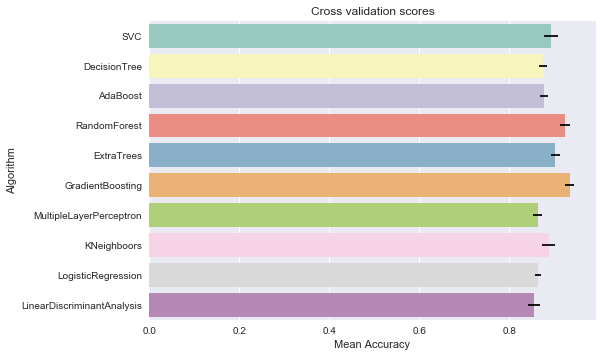

In [53]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
plt.show()

In [54]:
cv_res

,Algorithm,CrossValMeans,CrossValerrors
0,SVC,0.892723,0.014846
1,DecisionTree,0.875859,0.009050
2,AdaBoost,0.876603,0.009144
3,RandomForest,0.923853,0.010498
4,ExtraTrees,0.902471,0.010639
5,GradientBoosting,0.934731,0.009956
6,MultipleLayerPerceptron,0.862724,0.010914
7,KNeighboors,0.887474,0.014405
8,LogisticRegression,0.864219,0.007206
9,LinearDiscriminantAnalysis,0.854463,0.013898


In [55]:
model=classifiers[5]
model.fit(train_x,train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=2, subsample=1.0, verbose=0,
              warm_start=False)

In [56]:
model.score(test_x,test_y)

0.93703148425787108